Data Preprocessing and Exploration

In [1]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("erikbiswas/higgs-uci-dataset")

print("Path to dataset files:", path)








100%|██████████| 2.70G/2.70G [00:46<00:00, 62.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/erikbiswas/higgs-uci-dataset/versions/1


EDA

downloading and sampling dataset

In [2]:
files = os.listdir(path)
print("Files in dataset directory:", files)

file_path = os.path.join(path, 'HIGGS.csv')


df_sample = pd.read_csv(file_path)

sampled_data = df_sample.sample(frac=0.00005, random_state=1)
sampled_data.head()


Files in dataset directory: ['HIGGS.csv']


,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
7167245,0.0,0.605943,0.130458,-0.832536,0.512651,0.695112,0.952257,-0.949656,-0.135209,1.086538,...,-0.232818,-1.268241,0.000000,0.774815,0.817020,0.983446,0.758746,1.131731,0.848275,0.728045
8517518,0.0,2.936381,-0.196796,1.516298,1.105217,-1.685557,1.127502,0.169304,-0.131329,0.000000,...,-0.710859,-0.187825,3.101961,1.004112,0.978116,0.988564,0.804735,0.782948,0.943020,1.235933
5051746,1.0,0.766442,0.545368,1.173948,0.788290,-1.336209,0.881261,-0.328782,-1.222897,2.173076,...,0.062001,-0.497465,0.000000,0.626209,0.778465,0.988859,0.848208,1.507845,0.833819,0.698086
2882741,1.0,0.766991,-0.837667,-1.268102,1.264132,0.244497,1.596347,0.926830,-1.734585,0.000000,...,-0.542629,0.005388,1.550981,4.785272,2.466655,1.334983,1.070587,0.402402,1.543699,1.338696
882607,0.0,0.275429,-1.064602,0.164101,1.697738,1.370360,0.909751,-1.409123,0.924859,2.173076,...,0.640813,-1.322622,1.550981,0.821012,0.814566,0.989148,0.732568,1.656121,1.432110,1.603167


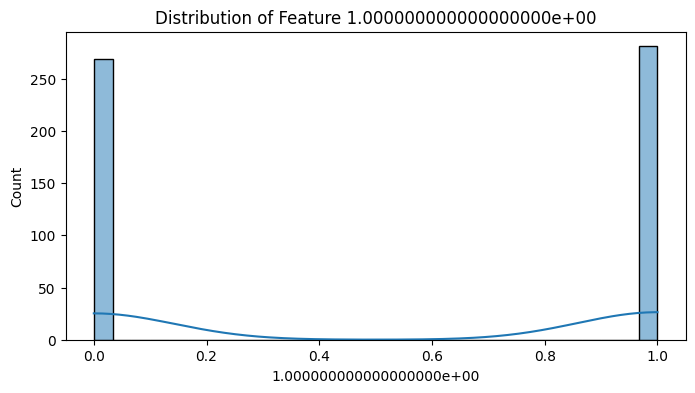

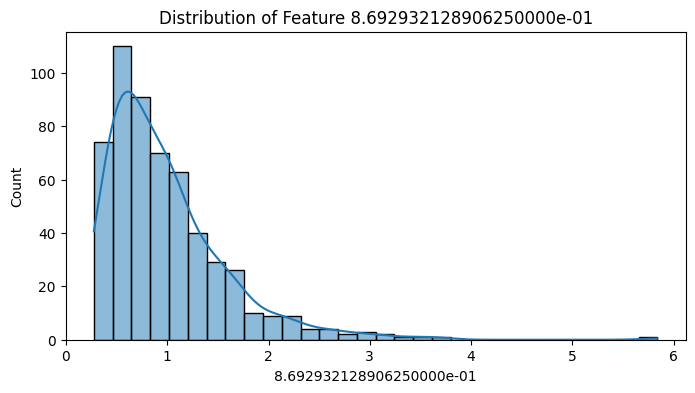

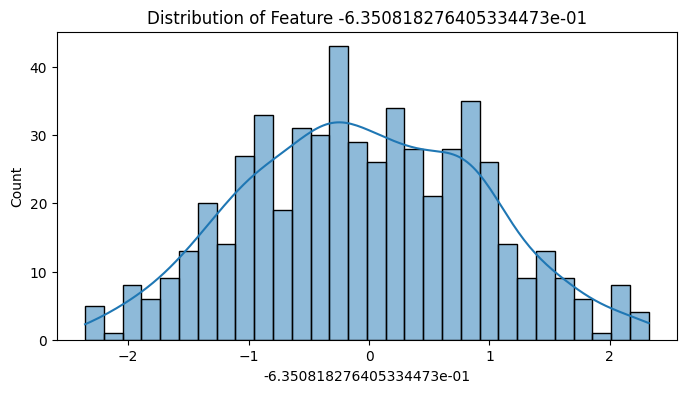

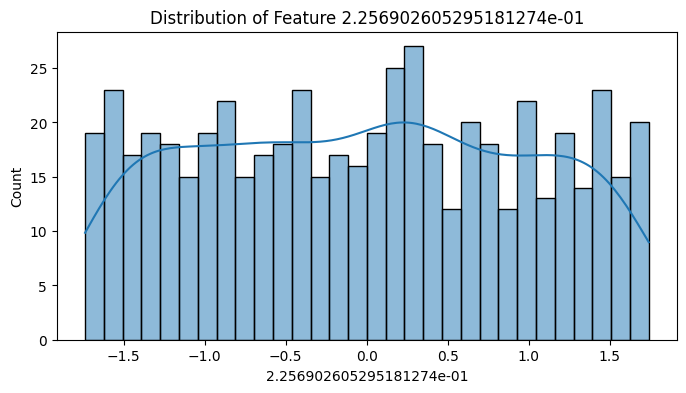

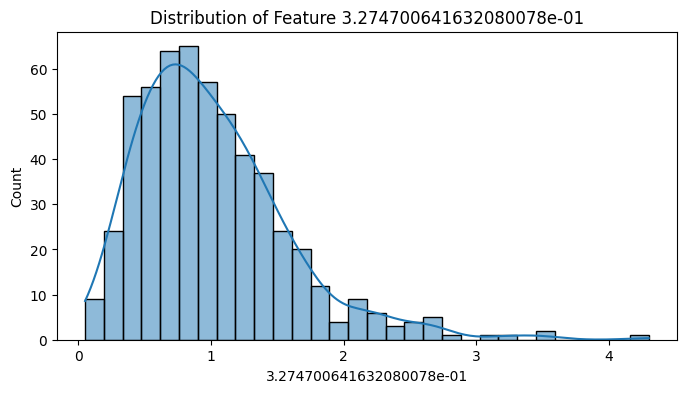

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature distributions for the first few columns
for col in sampled_data.columns[:5]:  # Adjust the number of columns as needed
    plt.figure(figsize=(8, 4))
    sns.histplot(sampled_data[col], kde=True, bins=30)
    plt.title(f"Distribution of Feature {col}")
    plt.show()


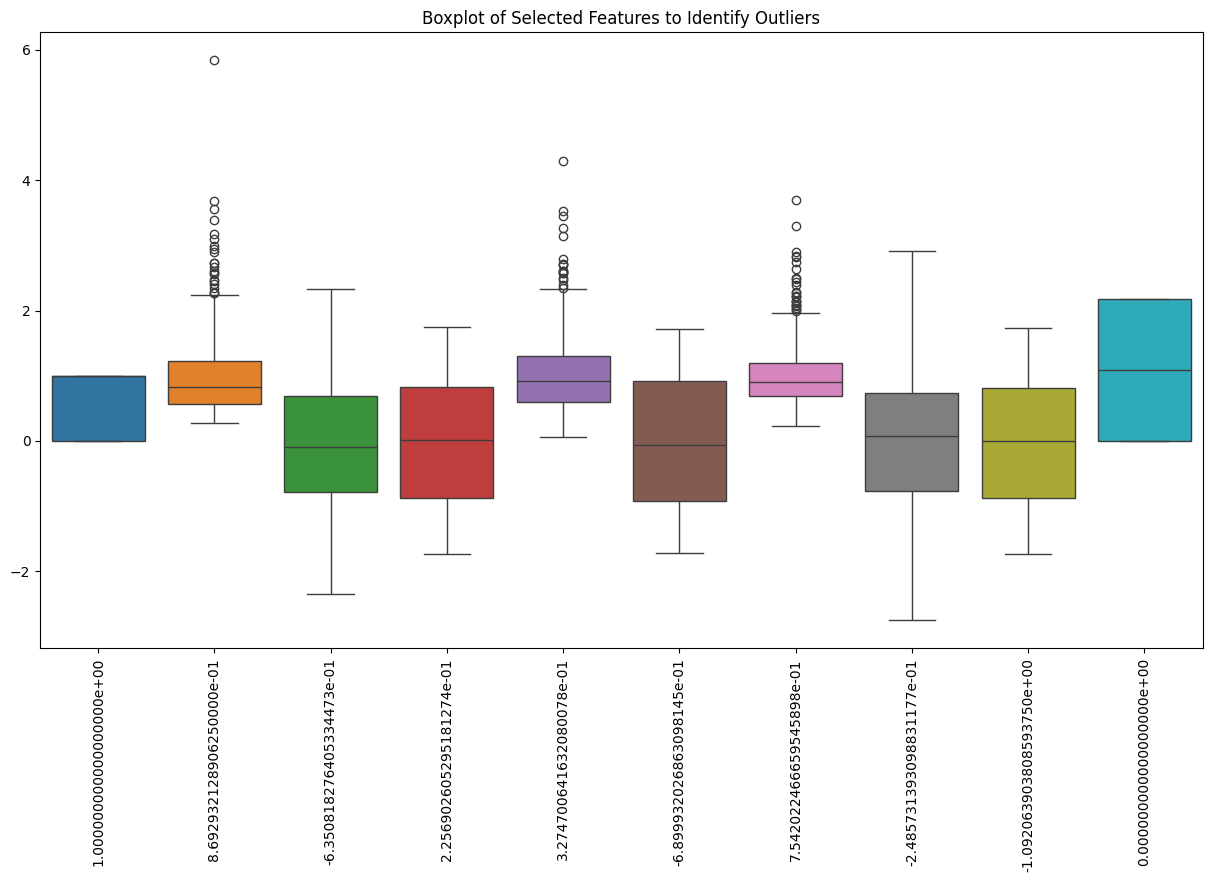

In [4]:
# Check for outliers using boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=sampled_data.iloc[:, :10])  # Adjust number of columns as needed
plt.xticks(rotation=90)
plt.title("Boxplot of Selected Features to Identify Outliers")
plt.show()


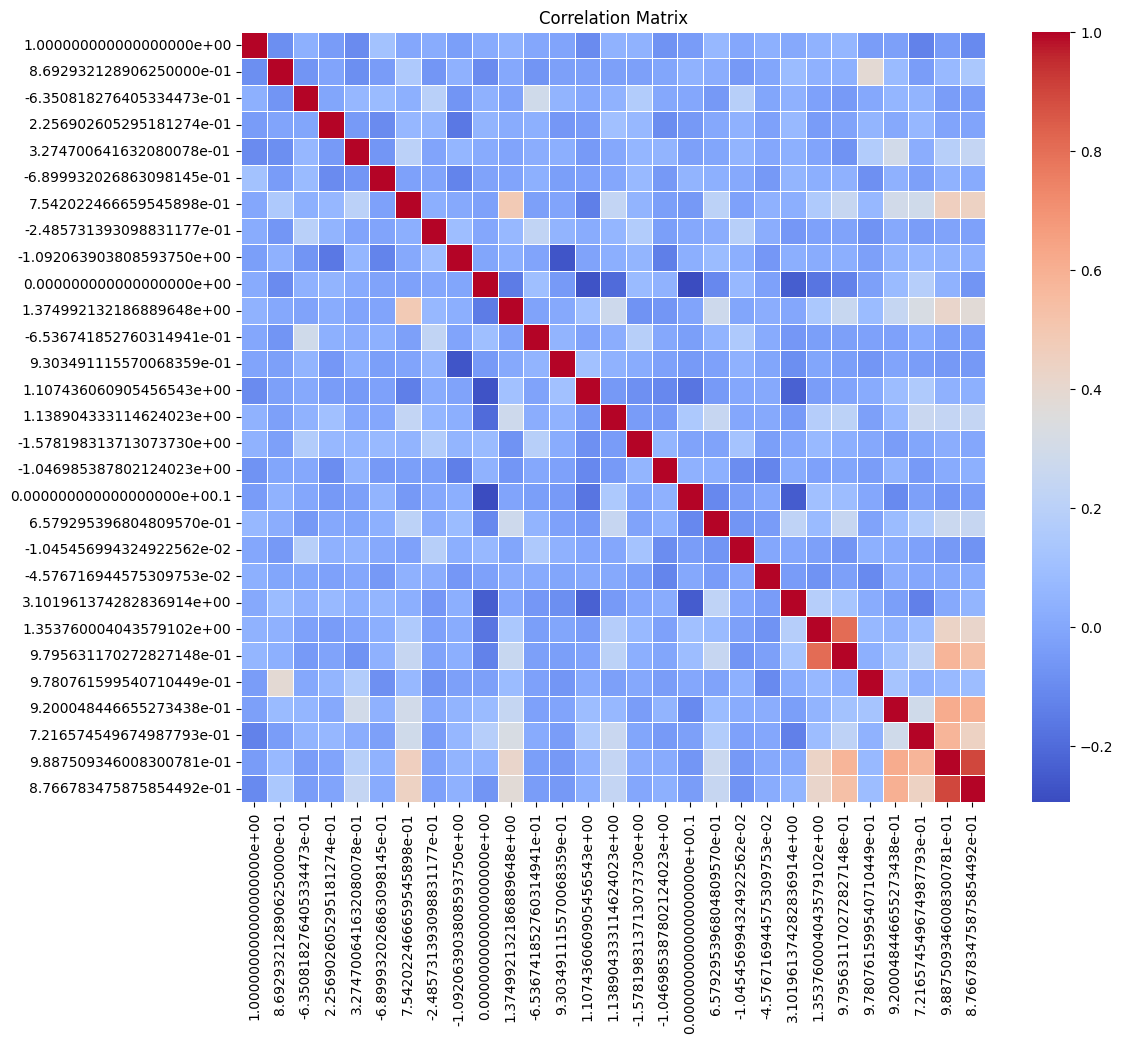

In [5]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
corr = sampled_data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


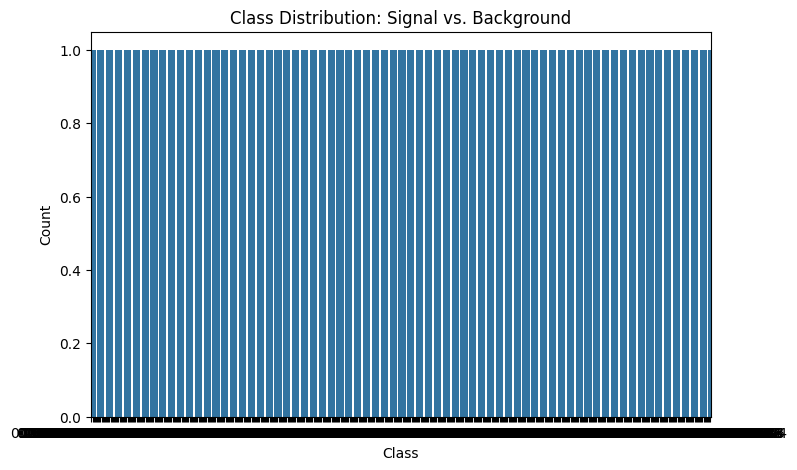

In [6]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=sampled_data.iloc[:, -1])  # Assuming the last column is the target
plt.title('Class Distribution: Signal vs. Background')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


handling missing value

In [7]:
print("\nMissing Values:")
print(sampled_data.isnull().sum())



Missing Values:
1.000000000000000000e+00      0
8.692932128906250000e-01      0
-6.350818276405334473e-01     0
2.256902605295181274e-01      0
3.274700641632080078e-01      0
-6.899932026863098145e-01     0
7.542022466659545898e-01      0
-2.485731393098831177e-01     0
-1.092063903808593750e+00     0
0.000000000000000000e+00      0
1.374992132186889648e+00      0
-6.536741852760314941e-01     0
9.303491115570068359e-01      0
1.107436060905456543e+00      0
1.138904333114624023e+00      0
-1.578198313713073730e+00     0
-1.046985387802124023e+00     0
0.000000000000000000e+00.1    0
6.579295396804809570e-01      0
-1.045456994324922562e-02     0
-4.576716944575309753e-02     0
3.101961374282836914e+00      0
1.353760004043579102e+00      0
9.795631170272827148e-01      0
9.780761599540710449e-01      0
9.200048446655273438e-01      0
7.216574549674987793e-01      0
9.887509346008300781e-01      0
8.766783475875854492e-01      0
dtype: int64


Data Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = sampled_data.iloc[:, 1:]  # Assuming first column is the target
y = sampled_data.iloc[:, 0]

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling in next steps
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("\nStandardized Data Sample:")
print(X_scaled.head())



Standardized Data Sample:
   8.692932128906250000e-01  -6.350818276405334473e-01  \
0                 -0.632110                   0.187941   
1                  3.236515                  -0.151367   
2                 -0.365675                   0.618135   
3                 -0.364764                  -0.815844   
4                 -1.180778                  -1.051138   

   2.256902605295181274e-01  3.274700641632080078e-01  \
0                 -0.809758                 -0.865500   
1                  1.531664                  0.164197   
2                  1.190395                 -0.386524   
3                 -1.243949                  0.440342   
4                  0.183734                  1.193815   

   -6.899932026863098145e-01  7.542022466659545898e-01  \
0                   0.677833                 -0.120324   
1                  -1.632651                  0.251674   
2                  -1.293602                 -0.271029   
3                   0.240502                  1.2

 Feature Engineering

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features of degree 2
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Convert to DataFrame for easier handling
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
print("\nPolynomial Features Sample:")
print(X_poly_df.head())



Polynomial Features Sample:
   8.692932128906250000e-01  -6.350818276405334473e-01  \
0                 -0.632110                   0.187941   
1                  3.236515                  -0.151367   
2                 -0.365675                   0.618135   
3                 -0.364764                  -0.815844   
4                 -1.180778                  -1.051138   

   2.256902605295181274e-01  3.274700641632080078e-01  \
0                 -0.809758                 -0.865500   
1                  1.531664                  0.164197   
2                  1.190395                 -0.386524   
3                 -1.243949                  0.440342   
4                  0.183734                  1.193815   

   -6.899932026863098145e-01  7.542022466659545898e-01  \
0                   0.677833                 -0.120324   
1                  -1.632651                  0.251674   
2                  -1.293602                 -0.271029   
3                   0.240502                  1

Feature Selection

In [10]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Initialize SVM model
svm = SVC(kernel="linear")  # Linear kernel preferred for RFE

# Perform RFE to select top features
selector = RFE(svm, n_features_to_select=10, step=1)
X_selected = selector.fit_transform(X_poly_df, y)

# Get selected feature names
selected_features = X_poly_df.columns[selector.support_]
print("\nSelected Features:")
print(selected_features)

# Convert selected features back to DataFrame for easier handling
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)



Selected Features:
Index(['1.353760004043579102e+00', '7.216574549674987793e-01',
       '9.887509346008300781e-01', '8.766783475875854492e-01',
       '3.274700641632080078e-01 1.374992132186889648e+00',
       '3.274700641632080078e-01 9.795631170272827148e-01',
       '7.542022466659545898e-01 9.887509346008300781e-01',
       '1.107436060905456543e+00 8.766783475875854492e-01',
       '1.353760004043579102e+00 9.887509346008300781e-01',
       '9.795631170272827148e-01 8.766783475875854492e-01'],
      dtype='object')


LINEAR SVM IMPLEMENTATION


implementing linear svm

Cross-Validated Accuracy: 0.6091 ± 0.0541
Cross-Validated Precision: 0.6210 ± 0.0735
Cross-Validated Recall: 0.6366 ± 0.0582
Cross-Validated F1 Score: 0.6233 ± 0.0328

Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.58      0.57        52
         1.0       0.61      0.60      0.61        58

    accuracy                           0.59       110
   macro avg       0.59      0.59      0.59       110
weighted avg       0.59      0.59      0.59       110

AUC (Area Under the ROC Curve): 0.6121

Detailed Metrics on Test Set:
Accuracy: 0.5909
Precision: 0.6140
Recall: 0.6034
F1 Score: 0.6087
AUC: 0.6121


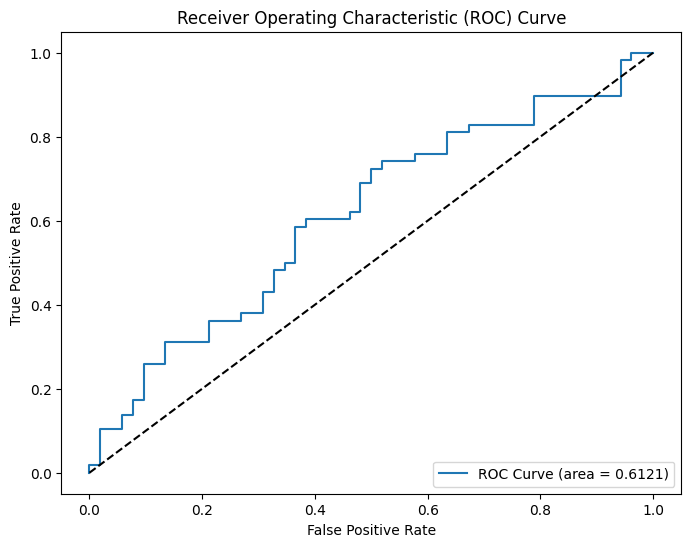

In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Initialize the SVM model using SGD with hinge loss (equivalent to linear SVM)
# Use `warm_start=True` for mini-batch learning by training in iterations
sgd_svm = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3, random_state=42)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on training data and collect metrics
cv_accuracy = cross_val_score(sgd_svm, X_train, y_train, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(sgd_svm, X_train, y_train, cv=cv, scoring='precision')
cv_recall = cross_val_score(sgd_svm, X_train, y_train, cv=cv, scoring='recall')
cv_f1 = cross_val_score(sgd_svm, X_train, y_train, cv=cv, scoring='f1')

# Print cross-validation results
print(f'Cross-Validated Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}')
print(f'Cross-Validated Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}')
print(f'Cross-Validated Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}')
print(f'Cross-Validated F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}')

# Train on full training set
sgd_svm.fit(X_train, y_train)

# Predict on test set
y_pred = sgd_svm.predict(X_test)
y_pred_proba = sgd_svm.decision_function(X_test)  # SVM scores for AUC

# Classification report for key metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Print detailed metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nDetailed Metrics on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")

# Plotting the ROC Curve ( for visualization)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Reporting key classification metrics

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', probability=True) # Initialize with probability=True for predict_proba
# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc:.4f}")



Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.65      0.65        52
         1.0       0.68      0.67      0.68        58

    accuracy                           0.66       110
   macro avg       0.66      0.66      0.66       110
weighted avg       0.66      0.66      0.66       110

AUC: 0.6797


scalability and efficiency

In [15]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGDClassifier with hinge loss (SVM)
sgd_model = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)

# Perform cross-validation on the SGD model
cv_accuracy_sgd = cross_val_score(sgd_model, X_train, y_train, cv=cv, scoring='accuracy')
cv_precision_sgd = cross_val_score(sgd_model, X_train, y_train, cv=cv, scoring='precision')
cv_recall_sgd = cross_val_score(sgd_model, X_train, y_train, cv=cv, scoring='recall')
cv_f1_sgd = cross_val_score(sgd_model, X_train, y_train, cv=cv, scoring='f1')

# Print cross-validation results for SGD
print(f'Cross-Validated Accuracy (SGD): {cv_accuracy_sgd.mean():.4f} ± {cv_accuracy_sgd.std():.4f}')
print(f'Cross-Validated Precision (SGD): {cv_precision_sgd.mean():.4f} ± {cv_precision_sgd.std():.4f}')
print(f'Cross-Validated Recall (SGD): {cv_recall_sgd.mean():.4f} ± {cv_recall_sgd.std():.4f}')
print(f'Cross-Validated F1 Score (SGD): {cv_f1_sgd.mean():.4f} ± {cv_f1_sgd.std():.4f}')


Cross-Validated Accuracy (SGD): 0.6091 ± 0.0541
Cross-Validated Precision (SGD): 0.6210 ± 0.0735
Cross-Validated Recall (SGD): 0.6366 ± 0.0582
Cross-Validated F1 Score (SGD): 0.6233 ± 0.0328


. SVM with Polynomial, RBF, and Custom Kernels

SVM with Polynomial Kernel

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time

# Define polynomial degrees to experiment with
poly_degrees = [2, 3, 4]

# Store results
results_poly = {}

# Loop through each polynomial degree
for degree in poly_degrees:
    # Define the model with the polynomial kernel
    model = SVC(kernel='poly', degree=degree, probability=True)

    # Define the parameter grid for C
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

    # Initialize Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1', return_train_score=True)

    # Timing the model fitting
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Get best model and scores
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_

    # Store results
    results_poly[degree] = {
        'best_model': best_model,
        'best_score': best_score,
        'training_time': training_time
    }

# Print results for polynomial kernels
for degree, result in results_poly.items():
    print(f"\nPolynomial Kernel (Degree {degree}):")
    print(f"Best Cross-Validation Score: {result['best_score']:.4f}")
    print(f"Training Time: {result['training_time']:.4f} seconds")



Polynomial Kernel (Degree 2):
Best Cross-Validation Score: 0.6674
Training Time: 2.5737 seconds

Polynomial Kernel (Degree 3):
Best Cross-Validation Score: 0.6782
Training Time: 4.8609 seconds

Polynomial Kernel (Degree 4):
Best Cross-Validation Score: 0.6773
Training Time: 2.2773 seconds


svm with rbf kernel

In [17]:
# Define gamma values to experiment with
gamma_values = [0.001, 0.01, 0.1, 1, 10]

# Store results
results_rbf = {}

# Loop through each gamma value
for gamma in gamma_values:
    # Define the model with the RBF kernel
    model = SVC(kernel='rbf', gamma=gamma, probability=True)

    # Define the parameter grid for C
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

    # Initialize Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1', return_train_score=True)

    # Timing the model fitting
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Get best model and scores
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_

    # Store results
    results_rbf[gamma] = {
        'best_model': best_model,
        'best_score': best_score,
        'training_time': training_time
    }

# Print results for RBF kernels
for gamma, result in results_rbf.items():
    print(f"\nRBF Kernel (Gamma {gamma}):")
    print(f"Best Cross-Validation Score: {result['best_score']:.4f}")
    print(f"Training Time: {result['training_time']:.4f} seconds")



RBF Kernel (Gamma 0.001):
Best Cross-Validation Score: 0.6737
Training Time: 1.3038 seconds

RBF Kernel (Gamma 0.01):
Best Cross-Validation Score: 0.6727
Training Time: 1.9178 seconds

RBF Kernel (Gamma 0.1):
Best Cross-Validation Score: 0.6727
Training Time: 2.5101 seconds

RBF Kernel (Gamma 1):
Best Cross-Validation Score: 0.6792
Training Time: 1.4000 seconds

RBF Kernel (Gamma 10):
Best Cross-Validation Score: 0.6727
Training Time: 1.4061 seconds


implementing a custom kernel

In [18]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

# Custom hybrid kernel
def hybrid_kernel(X, Y):
    return 0.5 * (rbf_kernel(X, Y, gamma=0.1) + np.dot(X, Y.T))

# Store results
results_custom = {}

# Define the custom kernel SVM
model_custom = SVC(kernel=hybrid_kernel, probability=True)

# Define the parameter grid for C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize Grid Search
grid_search_custom = GridSearchCV(model_custom, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1', return_train_score=True)

# Timing the model fitting
start_time = time.time()
grid_search_custom.fit(X_train, y_train)
training_time_custom = time.time() - start_time

# Get best model and scores
best_model_custom = grid_search_custom.best_estimator_
best_score_custom = grid_search_custom.best_score_

# Store results
results_custom['best_model'] = best_model_custom
results_custom['best_score'] = best_score_custom
results_custom['training_time'] = training_time_custom

# Print results for custom kernel
print(f"\nCustom Hybrid Kernel:")
print(f"Best Cross-Validation Score: {best_score_custom:.4f}")
print(f"Training Time: {training_time_custom:.4f} seconds")



Custom Hybrid Kernel:
Best Cross-Validation Score: 0.6793
Training Time: 3.9915 seconds


compare performance

In [19]:
from sklearn.metrics import classification_report, roc_auc_score

# Function to evaluate and report metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC: {auc_score:.4f}")

# Evaluate all models
print("\nEvaluating Polynomial Kernel Models:")
for degree, result in results_poly.items():
    print(f"Degree {degree}:")
    evaluate_model(result['best_model'], X_test, y_test)

print("\nEvaluating RBF Kernel Models:")
for gamma, result in results_rbf.items():
    print(f"Gamma {gamma}:")
    evaluate_model(result['best_model'], X_test, y_test)

print("\nEvaluating Custom Kernel:")
evaluate_model(results_custom['best_model'], X_test, y_test)



Evaluating Polynomial Kernel Models:
Degree 2:

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        52
         1.0       0.53      1.00      0.69        58

    accuracy                           0.54       110
   macro avg       0.77      0.51      0.37       110
weighted avg       0.75      0.54      0.38       110

AUC: 0.3468
Degree 3:

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.21      0.30        52
         1.0       0.53      0.81      0.64        58

    accuracy                           0.53       110
   macro avg       0.52      0.51      0.47       110
weighted avg       0.52      0.53      0.48       110

AUC: 0.5932
Degree 4:

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.19      0.30        52
         1.0       0.56      0.91      0.69        58

    accuracy      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

implementation for time complexity

In [20]:
import time
from sklearn.metrics import accuracy_score

# Function to measure training and prediction time for each kernel
def measure_time_complexity(model, X_train, y_train, X_test, y_test):
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return training_time, prediction_time, accuracy

# Evaluate time complexity for each kernel
results_time_complexity = {}

# For Polynomial Kernel
for degree in poly_degrees:
    model_poly = SVC(kernel='poly', degree=degree, C=1, probability=True)  # Set C for testing
    training_time, prediction_time, accuracy = measure_time_complexity(model_poly, X_train, y_train, X_test, y_test)
    results_time_complexity[f'Polynomial Degree {degree}'] = {
        'training_time': training_time,
        'prediction_time': prediction_time,
        'accuracy': accuracy
    }

# For RBF Kernel
for gamma in gamma_values:
    model_rbf = SVC(kernel='rbf', gamma=gamma, C=1, probability=True)  # Set C for testing
    training_time, prediction_time, accuracy = measure_time_complexity(model_rbf, X_train, y_train, X_test, y_test)
    results_time_complexity[f'RBF Gamma {gamma}'] = {
        'training_time': training_time,
        'prediction_time': prediction_time,
        'accuracy': accuracy
    }

# For Custom Kernel
model_custom = SVC(kernel=hybrid_kernel, C=1, probability=True)  # Set C for testing
training_time, prediction_time, accuracy = measure_time_complexity(model_custom, X_train, y_train, X_test, y_test)
results_time_complexity['Custom Hybrid Kernel'] = {
    'training_time': training_time,
    'prediction_time': prediction_time,
    'accuracy': accuracy
}

# Print the results
for kernel, times in results_time_complexity.items():
    print(f"\n{kernel}:")
    print(f"Training Time: {times['training_time']:.4f} seconds")
    print(f"Prediction Time: {times['prediction_time']:.4f} seconds")
    print(f"Accuracy: {times['accuracy']:.4f}")



Polynomial Degree 2:
Training Time: 0.0411 seconds
Prediction Time: 0.0033 seconds
Accuracy: 0.5545

Polynomial Degree 3:
Training Time: 0.0347 seconds
Prediction Time: 0.0027 seconds
Accuracy: 0.5636

Polynomial Degree 4:
Training Time: 0.0369 seconds
Prediction Time: 0.0029 seconds
Accuracy: 0.5455

RBF Gamma 0.001:
Training Time: 0.0423 seconds
Prediction Time: 0.0042 seconds
Accuracy: 0.5364

RBF Gamma 0.01:
Training Time: 0.0416 seconds
Prediction Time: 0.0039 seconds
Accuracy: 0.5364

RBF Gamma 0.1:
Training Time: 0.0701 seconds
Prediction Time: 0.0039 seconds
Accuracy: 0.6182

RBF Gamma 1:
Training Time: 0.0451 seconds
Prediction Time: 0.0037 seconds
Accuracy: 0.6000

RBF Gamma 10:
Training Time: 0.0541 seconds
Prediction Time: 0.0043 seconds
Accuracy: 0.5545

Custom Hybrid Kernel:
Training Time: 0.0385 seconds
Prediction Time: 0.0066 seconds
Accuracy: 0.7091


hyperparameter tuning

using bayesian optimization

In [21]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


In [22]:
from skopt import BayesSearchCV
import numpy as np
from sklearn.svm import SVC

# Define the search space
search_space = {
    'C': (1e-3, 1e3, 'log-uniform'),  # Regularization parameter
    'gamma': (1e-3, 1e2, 'log-uniform'),  # RBF kernel parameter
    'degree': (2, 4),  # For Polynomial kernel
    'kernel': ['linear', 'poly', 'rbf']  # Kernels to consider
}

# Create SVC model
svm_model = SVC()

# Create Bayesian Search with Cross-Validation
bayes_search = BayesSearchCV(svm_model, search_space, n_iter=50, cv=5, n_jobs=-1, random_state=42)

# Fit to the data
bayes_search.fit(X_train, y_train)

# Get the best parameters and score
best_params_bayes = bayes_search.best_params_
best_score_bayes = bayes_search.best_score_

print("Best Parameters (Bayesian Optimization): ", best_params_bayes)
print("Best Cross-Validation Accuracy (Bayesian Optimization): {:.4f}".format(best_score_bayes))


Best Parameters (Bayesian Optimization):  OrderedDict([('C', 0.43173381316296905), ('degree', 2), ('gamma', 0.001), ('kernel', 'linear')])
Best Cross-Validation Accuracy (Bayesian Optimization): 0.6545


hyperparameter sensitivity analysis

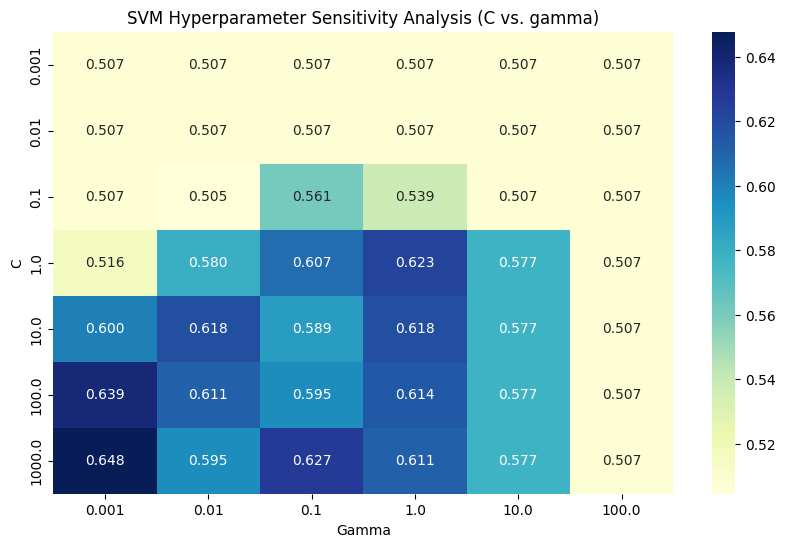

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Example for sensitivity analysis on 'C' and 'gamma'
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'gamma': np.logspace(-3, 2, 6),
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Extract results for heatmap
results = grid_search.cv_results_
scores_matrix = results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".3f", cmap="YlGnBu",
            xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.title('SVM Hyperparameter Sensitivity Analysis (C vs. gamma)')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()


summarizing results

In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# Assuming X_train, y_train are defined

# Initialize results summary
results_summary = {
    'Kernel': [],
    'Best C': [],
    'Best gamma': [],
    'Best Degree': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'AUC': []
}

kernels = ['rbf', 'poly', 'linear']
for kernel in kernels:
  # Perform grid search
  grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)

  # Get best parameters and model
  best_params = grid_search.best_params_
  best_model = grid_search.best_estimator_

  # Predict using the best model
  y_pred = best_model.predict(X_train) # Or X_test if available

  # Calculate metrics and store results
  results_summary['Kernel'].append(kernel)
  results_summary['Best C'].append(best_params.get('C', None))
  results_summary['Best gamma'].append(best_params.get('gamma', None))
  # Consistent handling of 'Best Degree'
  results_summary['Best Degree'].append(best_params.get('degree', None))
  results_summary['Accuracy'].append(accuracy_score(y_train, y_pred)) # Or y_test if available
  results_summary['Precision'].append(precision_score(y_train, y_pred)) # Or y_test if available
  results_summary['Recall'].append(recall_score(y_train, y_pred)) # Or y_test if available
  results_summary['F1-score'].append(f1_score(y_train, y_pred)) # Or y_test if available
  results_summary['AUC'].append(roc_auc_score(y_train, y_pred)) # Or y_test if available


# Create DataFrame from results_summary
results_df = pd.DataFrame(results_summary)

comparing performance and analysis

In [29]:
# Example of a function to compare and analyze results
def compare_kernels(results_df):
    print("Comparison of SVM Kernel Performance:")
    best_kernel = results_df.loc[results_df['Accuracy'].idxmax()]
    print("\nBest Kernel Based on Accuracy:")
    print(best_kernel)

    # Additional comparisons
    for index, row in results_df.iterrows():
        print(f"\nKernel: {row['Kernel']}")
        print(f"Accuracy: {row['Accuracy']:.4f}, Precision: {row['Precision']:.4f}, "
              f"Recall: {row['Recall']:.4f}, F1-score: {row['F1-score']:.4f}, AUC: {row['AUC']:.4f}")

    # Insights on suitability based on metrics
    print("\nInsights:")
    if best_kernel['Kernel'] == 'rbf':
        print("RBF kernel shows the best balance between performance and generalization.")
    elif best_kernel['Kernel'] == 'poly':
        print("Polynomial kernel may capture more complex relationships in the data.")
    else:
        print("Linear kernel is efficient and performs well for simpler decision boundaries.")

# Call the comparison function
compare_kernels(results_df)


Comparison of SVM Kernel Performance:

Best Kernel Based on Accuracy:
Kernel              rbf
Best C           1000.0
Best gamma        0.001
Best Degree        None
Accuracy       0.684091
Precision      0.670732
Recall          0.73991
F1-score       0.703625
AUC            0.683319
Name: 0, dtype: object

Kernel: rbf
Accuracy: 0.6841, Precision: 0.6707, Recall: 0.7399, F1-score: 0.7036, AUC: 0.6833

Kernel: poly
Accuracy: 0.6841, Precision: 0.6707, Recall: 0.7399, F1-score: 0.7036, AUC: 0.6833

Kernel: linear
Accuracy: 0.6841, Precision: 0.6707, Recall: 0.7399, F1-score: 0.7036, AUC: 0.6833

Insights:
RBF kernel shows the best balance between performance and generalization.


explainability

  0%|          | 0/110 [00:00<?, ?it/s]

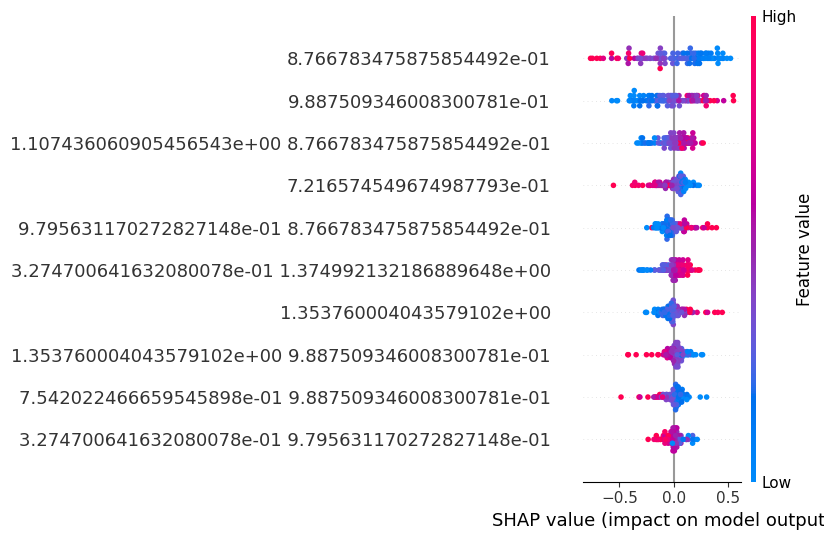

In [30]:
!pip install shap

import shap
best_C = results_df.loc[results_df['Kernel'] == 'rbf', 'Best C'].values[0]
best_gamma = results_df.loc[results_df['Kernel'] == 'rbf', 'Best gamma'].values[0]

# Choose the best model, for example, the RBF kernel SVM
best_model = SVC(kernel='rbf', C=best_C, gamma=best_gamma)  # Use best hyperparameters
best_model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.KernelExplainer(best_model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)
